- https://platform.openai.com/docs/guides/text-to-speech
- https://platform.openai.com/docs/guides/audio


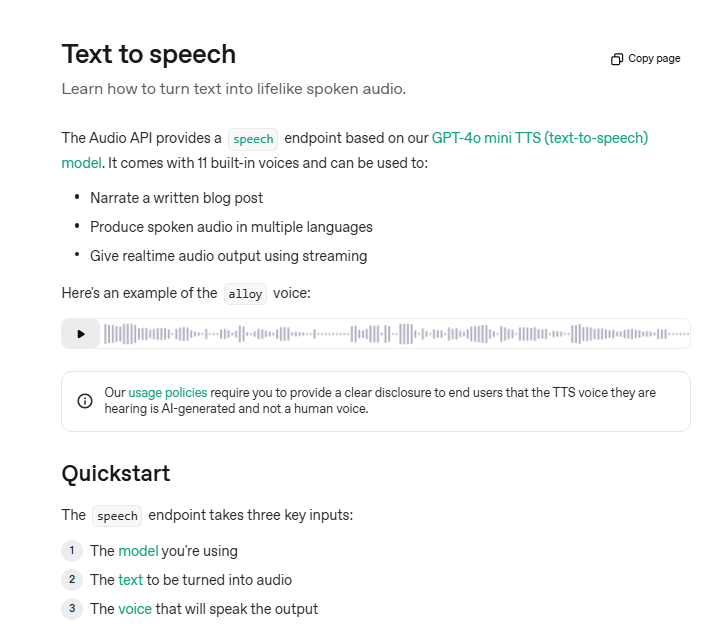
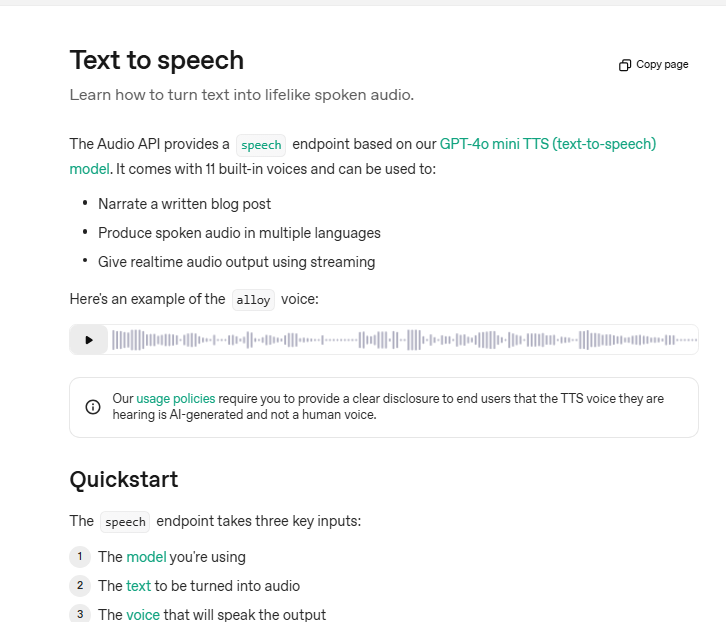

In [1]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
from openai import OpenAI
from dotenv import find_dotenv, load_dotenv
import requests

In [3]:
import warnings

# Ignore only DeprecationWarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [4]:
_ : bool = load_dotenv(find_dotenv()) # read local .env file

client : OpenAI = OpenAI()

In [5]:
_

True

In [6]:
from pathlib import Path
from openai import OpenAI

client = OpenAI()
speech_file_path = Path("speech.mp3")  # Fixed path for notebooks

with client.audio.speech.with_streaming_response.create(
    model="tts-1",  # or "tts-1-hd"
    voice="nova",   # or "shimmer", "echo", "fable", etc.
    input="Today is a wonderful day to build something people love!",
) as response:
    response.stream_to_file(speech_file_path)

print("Speech saved to:", speech_file_path)

Speech saved to: speech.mp3


In [7]:
from pathlib import Path
from openai import OpenAI
client = OpenAI()

speech_file_path : str = "urdu.mp3"
response = client.audio.speech.create(
  model="tts-1",
  voice="alloy",
  input="میرا نام محمد فرحان اسلم ہے۔ میں ایک مشین لرننگ انجینیئر اور ڈیٹا سائنٹسٹ ہوں۔"
)

response.stream_to_file(speech_file_path)
print("Speech saved to:", speech_file_path)

Speech saved to: urdu.mp3


## **Streaming realtime audio**

In [8]:
%pip install openai[voice_helpers]

Note: you may need to restart the kernel to use updated packages.


In [9]:
%pip install pydub

Note: you may need to restart the kernel to use updated packages.


## **Stream live**

In [12]:
import nest_asyncio
nest_asyncio.apply()

import asyncio
from openai import AsyncOpenAI
from openai.helpers import LocalAudioPlayer

openai = AsyncOpenAI()

async def main() -> None:
    input_text = ('''
        The Israel-Palestine conflict is a complex and protracted struggle rooted in over a century of historical, religious, and political developments. 
        Its origins trace back to the decline of the Ottoman Empire, British colonial rule, the rise of the Zionist movement, and the emergence of Palestinian national identity. 
        In 1948, the establishment of the state of Israel led to the displacement of hundreds of thousands of Palestinians in what they refer to as the \"Nakba\" (catastrophe). 
        Since then, the region has witnessed repeated wars, uprisings, peace talks, and persistent resistance movements. 
        While Israel stands as a powerful state backed by international alliances and military strength, 
        Palestinians continue to fight for independence, statehood, and the right of return. 
        Despite numerous UN resolutions and global diplomatic efforts, the conflict remains unresolved, 
        with Jerusalem symbolizing both the spiritual heart and political epicenter of the dispute.'''
    )

    async with openai.audio.speech.with_streaming_response.create(
        model="tts-1",
        voice="nova",
        input=input_text,
        response_format="pcm",
    ) as response:
        await LocalAudioPlayer().play(response)

# Run with event loop fix
await main()

In [13]:
import nest_asyncio
nest_asyncio.apply()

import asyncio
from openai import AsyncOpenAI
from pathlib import Path

openai = AsyncOpenAI()

async def main() -> None:
    input_text = """
    The Israel-Palestine conflict is a complex and protracted struggle rooted in over a century of historical, religious, and political developments.
    Its origins trace back to the decline of the Ottoman Empire, British colonial rule, the rise of the Zionist movement, and the emergence of Palestinian national identity.
    In 1948, the establishment of the state of Israel led to the displacement of hundreds of thousands of Palestinians in what they refer to as the "Nakba" (catastrophe).
    Since then, the region has witnessed repeated wars, uprisings, peace talks, and persistent resistance movements.
    While Israel stands as a powerful state backed by international alliances and military strength, Palestinians continue to fight for independence, statehood, and the right of return.
    Despite numerous UN resolutions and global diplomatic efforts, the conflict remains unresolved, with Jerusalem symbolizing both the spiritual heart and political epicenter of the dispute.
    """

    audio_file_path = Path("palestine_conflict.mp3")

    async with openai.audio.speech.with_streaming_response.create(
        model="tts-1",
        voice="alloy",
        input=input_text,
        response_format="mp3",
    ) as response:
        await response.stream_to_file(audio_file_path)

    print(f"Audio saved to: {audio_file_path.absolute()}")

# Run the async function
await main()


Audio saved to: f:\Data Science\Projects\Generative-AI-Learning-Path-From-Fundamentals-to-Advanced-Applications\06_openai\10_multimodal_gen_ai\01_text_to_speech\palestine_conflict.mp3
